In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

import scipy.stats as stats
from scipy.stats import f,f_oneway #Anova Testing
from scipy.stats import kruskal #Kruskal Testing
from scipy.stats import mannwhitneyu # Alternate for two sample ttest if data is not normal
from scipy.stats import t,ttest_ind #Two Sample Test for independent variable
from scipy.stats import norm
from scipy.stats import chi2_contingency,chi2 #Test for two categorical Values
from scipy.stats import shapiro #Test for normality
from scipy.stats import levene #Test for variance

In [2]:
df = pd.read_csv("bike_sharing.csv")

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Initial Analysis


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df["datetime"] = pd.to_datetime(df["datetime"]) #Datetime column is coverted to datetime dtype

In [7]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [8]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [9]:
print(df["season"].value_counts())
print(df["workingday"].value_counts())

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64


In [10]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [11]:
df.shape

(10886, 12)

#### Test to check Number of cycles rented is normallly distributed or not

In [12]:
# Mostly we will use count variable,
# But from plot we are not able to check its a gaussian distribution or not
# Let's statistically prove that by shapiro test

In [13]:
# Shapiro Test 
#---------------
# H0: Number cycle rented is Normally distributed
# Ha: Number cycle rented is Not normally distributed
# Significant Value: 0.01


In [14]:
alpha = 0.01

shapiro_stat, p_value = shapiro(df["count"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",shapiro_stat)
print("P_value:",p_value)
print("Critical Value: ")

Reject Null Hypothesis
Test Statistic Value:  0.8783695697784424
P_value: 0.0
Critical Value: 


c:\Users\revan\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


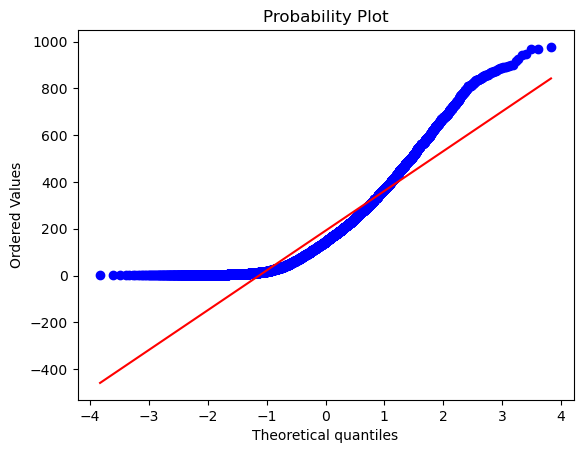

In [15]:
# Graphical checking of normality
# Quartile-Quartile plot
stats.probplot(df["count"],dist="norm",plot=pylab)
pylab.show()


In [16]:
# we can see that the points are nor lying in straight line
# From test and graphical representation we can see that count feature is not normally distributed
# Hence we will use kruskal instead of anova.

#### Test to check the variance

In [17]:
# levene’s test
#______________
# H0: Number cycle rented have same variance
# Ha: Number cycle rented doesn't have same variance
# Significant Value: 0.05


In [18]:
alpha = 0.05

kruskal_stat, p_value = levene(
                        df[df["workingday"]==0]["count"],
                        df[df["workingday"]==1]["count"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",kruskal_stat)
print("P_value:",p_value)
print("Critical Value: ")

Fail to reject Null Hypothesis
Test Statistic Value:  0.004972848886504472
P_value: 0.9437823280916695
Critical Value: 


<AxesSubplot:xlabel='workingday', ylabel='count'>

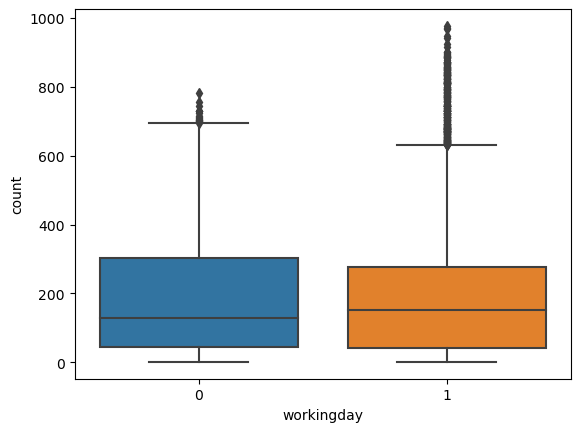

In [19]:
# Variance between working day and holiday remains same
# From test we can find that there is no major diff between variance
# lets analyze visually
sns.boxplot(data=df,x="workingday",y="count")

#### Hypothetical testing between season and count

<AxesSubplot:xlabel='season', ylabel='count'>

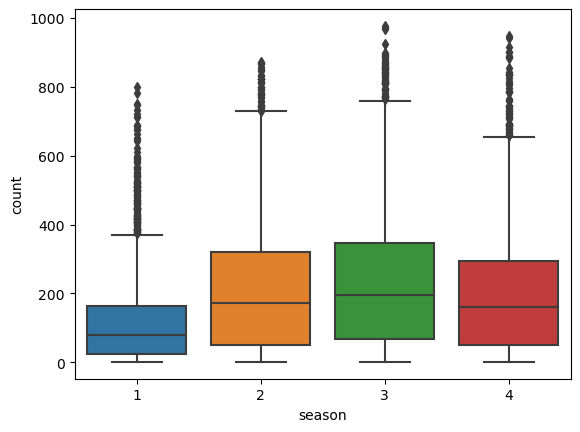

In [20]:
sns.boxplot(data=df,x="season",y="count")

In [21]:
# Anova or Kruskal Walli's Test
# Assumption for Anova:
# ---------------------

# 1. The population from which samples are drawn should be normally distributed. -- False
#     No, the data is not normally distributed 
# 2. Independence of cases: the sample cases should be independent of each other. -- True
#     yes the sample are independent of each other
# 3. Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal. -- False
#     From levene test and graphically also the variance varies among diff groups 
     

# Our data doesn't meet the requirements to conduct anova test for these two variables, Hence we are going to use Kruskal Wallis test
# ________________________________________________________________________________________________________________________

# H0 : Mean of count for all season is same
# Ha : Mean of each season count is varies
# Significant Value: 0.05
# Critical Value: 2.605725028634713

In [22]:
# Lets test the variance of each group is approximately equal by Levene's test
# H0: Number cycle rented have same variance with season groups
# Ha: Number cycle rented doesn't have same variance with season groups
alpha = 0.05
levene_stat, p_value = levene(
                        df[df["season"]==1]["count"],
                        df[df["season"]==2]["count"],
                        df[df["season"]==3]["count"],
                        df[df["season"]==4]["count"],
)
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",levene_stat)
print("P_value:",p_value)

Reject Null Hypothesis
Test Statistic Value:  187.7706624026276
P_value: 1.0147116860043298e-118


In [23]:
alpha = 0.05
cr = f.ppf(1-alpha,dfn=3,dfd=10886-3)
kruskal_stat, p_value = kruskal(
                        df[df["season"]==1]["count"],
                        df[df["season"]==2]["count"],
                        df[df["season"]==3]["count"],
                        df[df["season"]==4]["count"],
)
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",kruskal_stat)
print("P_value:",p_value)
print("Critical Value: ", cr)

Reject Null Hypothesis
Test Statistic Value:  699.6668548181988
P_value: 2.479008372608633e-151
Critical Value:  2.605725028634713


In [24]:
# After Test
# we rejecting our null hypothesis, which means one group season data mean is not identical to other season's data
# From the above test we can identified that No. of cycles rented are varies in different seasons.

##### Anova test

In [25]:
# We will try to use Anova test to find error
# H0 : Mean of count for all season is same
# Ha : Mean of each season count is varies
# Significant Value: 0.05

In [26]:
alpha = 0.05
cr = f.ppf(1-alpha,dfn=3,dfd=10886-3)
Anova_stat, p_value = f_oneway(
                        df[df["season"]==1]["count"],
                        df[df["season"]==2]["count"],
                        df[df["season"]==3]["count"],
                        df[df["season"]==4]["count"],
)
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",Anova_stat)
print("P_value:",p_value)
print("Critical Value: ", cr)

Reject Null Hypothesis
Test Statistic Value:  236.94671081032106
P_value: 6.164843386499654e-149
Critical Value:  2.605725028634713


In [27]:
# Both Kruskal and Anova test reject null hypothesis
# But there is an error in Anova test lets find out
# In kruskal test the P_Value = 2.479008372608633e-151, For anova test the P_value = 6.164843386499654e-149,Both are very low values,
# Even though there is a glitch in Anova, it gives us larger values compared to Kruskal test. Its a type of error
# If the data is not normally distributed, for safer side we can go with kruskal or alternatives test

#### Hypothetical testing between Working Day and Number of electric cycles rented

#### Working Day has effect on number of electric cycles rented

<AxesSubplot:xlabel='workingday', ylabel='count'>

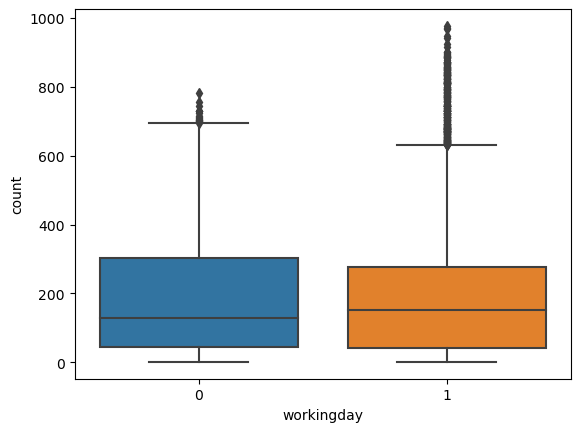

In [28]:
sns.boxplot(data=df,x="workingday",y="count")

In [29]:
# Anova or ttest_ind(Two groups of sample only)
# Assumption for Anova:
# ---------------------

# 1. The population from which samples are drawn should be normally distributed. -- False
#     No, the data is not normally distributed 
# 2. Independence of cases: the sample cases should be independent of each other. -- True
#     yes the sample are independent of each other
# 3. Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal. -- False
#     From levene test and graphically also the variance varies among diff groups 

# Our data doesn't meet the requirements to conduct anova test for these two variables, Hence we are going to use mannwhitneyu
# Because our dependent variable is not normally distributed
# ________________________________________________________________________________________________________________________

# H0 : Mean of count for working day and holiday is same
# Ha : Mean of count varies for working day and holiday
# Significant Value: 0.05
# Critical Value: 2.605725028634713

In [30]:
alpha = 0.05
cr = f.ppf(1 - alpha,dfn=1,dfd=10886-1)
mannwhiteneyu_stat, p_value = mannwhitneyu(
                        df[df["workingday"]==0]["count"],
                        df[df["workingday"]==1]["count"],
                        )
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",mannwhiteneyu_stat)
print("P_value:",p_value)
print("Critical Value: ", cr)

Fail to reject Null Hypothesis
Test Statistic Value:  12880792.5
P_value: 0.9679139953914079
Critical Value:  3.842313268641915


In [31]:
# We conduct a manwhitneyu test because our our sample data of count doesn't follow normal distribution
# Our test failed to reject null hypothesis, which means that the working day won't cause anything in number of cycles rented
# From the test we found that irrespective of working day or holiday cycles are rented by people

In [32]:
df.groupby("workingday")["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Count'>

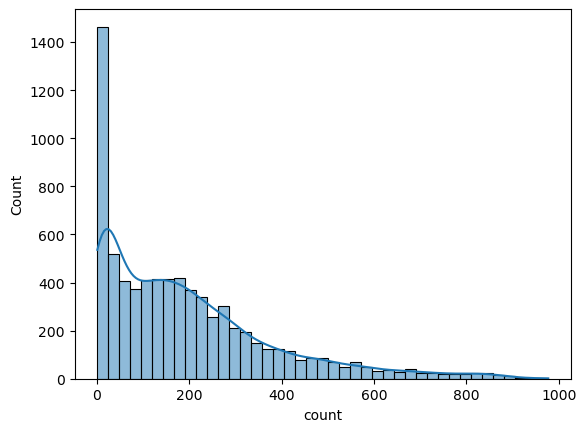

In [33]:
sns.histplot((df[df["workingday"] == 1]["count"]),kde=True)

In [34]:
# Anyhow we can't use two sample t-test here, Because the data is not normally distributed
# But we will try to find the error of statistical values
#########################################################
# Two Sample T-test

# H0: Working day and holiday doesn't affect cycles rented count
# Ha: Working day and holiday affect cycles rented count
# Significant Value: 0.05

In [35]:
df.shape

(10886, 12)

In [36]:
alpha = 0.05  # Significant Value
cr = t.ppf(1-alpha/2,df = 10886-1)  #df = n-1: n=10886
Two_sample_stat, p_value = ttest_ind(
                    df[df["workingday"]==1]["count"],
                    df[df["workingday"]==0]["count"],
                    alternative="two-sided"
                    )
if p_value<alpha/2:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",Two_sample_stat)
print("P_value:",p_value)
print("Critical Value: ", cr)

Fail to reject Null Hypothesis
Test Statistic Value:  1.2096277376026694
P_value: 0.22644804226361348
Critical Value:  1.9601819478430889


In [37]:
# Lets analyse the results
# The mannwhiteneyu tests P_value = 0.9679139953914079 and Two sample ttest P value = 0.22644804226361348\
# There is major diff in P_Value. 
# Levene's test shows that the variance is not varies that much,But our data is not normally dostributed
# In these type of scenario better we can go for Mannwhiteneyu test for a safer side

#### Hypothetical testing for Weather and count

<AxesSubplot:xlabel='weather', ylabel='count'>

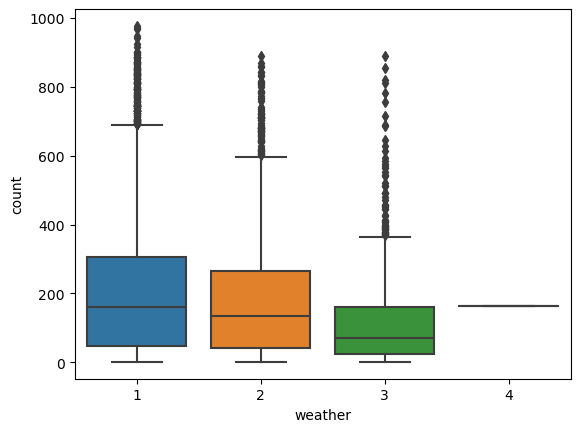

In [38]:
sns.boxplot(data=df,x="weather",y="count")

In [39]:
# Weather Characteristics
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# _________________________________________________________
# Analysis from data
# There are  many outliers in weather and count relation
# Weather creates a major impact in count of cycles
# Lets proove the above analysis statistically

In [40]:
# Anova or kruskal wills
# Assumption for Anova:
# ---------------------

# 1. The population from which samples are drawn should be normally distributed. -- False
#     No, the data is not normally distributed 
# 2. Independence of cases: the sample cases should be independent of each other. -- True
#     yes the sample are independent of each other
# 3. Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal. -- False
#     From levene test and graphically also the variance varies among diff groups 

# Our count data is not normally distributed and we can't use any normal distribution tests here
# Hence we will go with Kruskal's will test to find whether the weather feature creates any impact on count data
# ________________________________________________________________________________________________________________________

# H0 : Weather doesn't make any impact on cycles rented
# Ha : Weather makes a particular amount of impact on cycles rented
# Significant Value: 0.05
# Critical Value: 2.605725028634713

In [41]:
# Lets test the variance of each group is approximately equal by Levene's test
# H0: Number cycle rented have same variance with weather groups
# Ha: Number cycle rented doesn't have same variance with weather groups
alpha = 0.05
levene_stat, p_value = levene(
                        df[df["weather"]==1]["count"],
                        df[df["weather"]==2]["count"],
                        df[df["weather"]==3]["count"],
                        df[df["weather"]==4]["count"],
)
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",levene_stat)
print("P_value:",p_value)

Reject Null Hypothesis
Test Statistic Value:  54.85106195954556
P_value: 3.504937946833238e-35


In [42]:
alpha = 0.05  # Significant Value
cr = f.ppf(1-alpha,dfn=3,dfd=10886-3)  #dfn = 4 groups - 1 group and dfd = total group - dfn
kruskal_stat, p_value = kruskal(
                        df[df["weather"]==1]["count"],
                        df[df["weather"]==2]["count"],
                        df[df["weather"]==3]["count"],
                        df[df["weather"]==4]["count"],
                        )
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",kruskal_stat)
print("P_value:",p_value)
print("Critical Value: ", cr)

Reject Null Hypothesis
Test Statistic Value:  205.00216514479087
P_value: 3.501611300708679e-44
Critical Value:  2.605725028634713


In [43]:
# From the above test, we can accept alternate hypothesis, because our p_value is very lower than significance level
# So from kruskal hypothetical test we found that the data of weather makes a great impact on cycles rented
# The mean of each group is varies from another group level in count of cycles rented

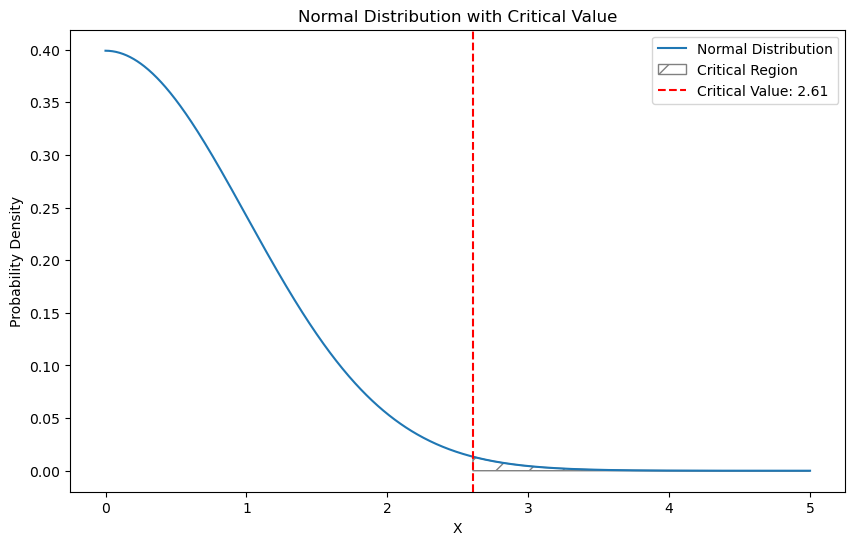

In [44]:
mu = 0
sigma = 1

# Calculate the critical value using the inverse survival function (ppf)
alpha = 0.05  # significance level
crit_value = f.ppf(1-alpha,dfn=3,dfd=10886-3)
# Generate some data to plot the normal distribution
x = np.linspace(0, 5, 1000)
y = norm.pdf(x, loc=mu, scale=sigma)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='Normal Distribution')
ax.fill_between(x, 0, y, where=x>=crit_value, hatch='/', edgecolor='gray', facecolor='none', label='Critical Region')



ax.axvline(x=crit_value, color='r', linestyle='--', label=f'Critical Value: {crit_value:.2f}')

# Add labels and legend to the plot
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution with Critical Value')
ax.legend()

plt.show()

In [45]:
df.groupby("weather")["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

### Hypothetical testing between weather and season

In [46]:
df["weather"].value_counts(),df["season"].value_counts()

(1    7192
 2    2834
 3     859
 4       1
 Name: weather, dtype: int64,
 4    2734
 2    2733
 3    2733
 1    2686
 Name: season, dtype: int64)

([<matplotlib.axis.XTick at 0x17d4733dbe0>,
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Mist'),
  Text(2, 0, 'Light Rain'),
  Text(3, 0, 'Heavy Rain')])

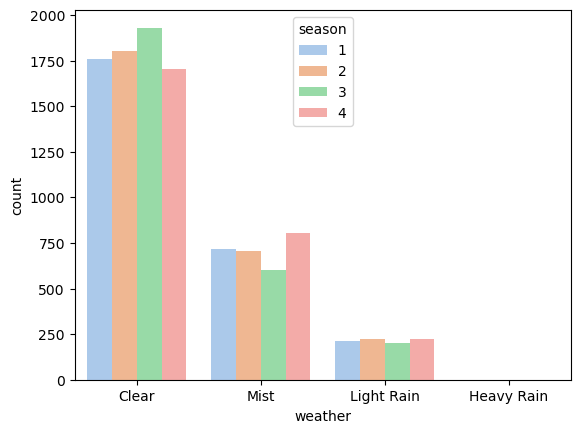

In [47]:
weather_labels = {1: "Clear", 2: "Mist", 3: "Light Rain", 4: "Heavy Rain"}
sns.countplot(data=df,x="weather", hue="season",palette="pastel")

plt.xticks(ticks=[0, 1, 2, 3], labels=weather_labels.values())


In [48]:
pd.crosstab(index=df["weather"],columns=df["season"],margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [49]:
# Weather Characteristics
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# season:
# 1: spring, 
# 2: summer,
# 3: fall,
# 4: winter

# _________________________________________________________
# Analysis from data
# On an average cycles rented in clear day is greater than other weathers and seasons
# Does weather impact season? yes from data we can see weather  makes impact on season
# Lets prove statistically


In [50]:
# ChiSquare test
# Assumption for Chisquare:
# ---------------------

# The data is categorical: Yes
# The observations are independent: Yes
# The expected frequencies are greater than 5: Yes
# The sample size is large: Yes

# Both weather and season are categorical values
# observation are totally independent
# In our data we won't consider heavy rain parameter, why beacause it doesn't have enough sample to prove. Hence we will ignore that
# _______________________________________________________

# H0 : There is no association between the weather and season,
# Ha : There is a significant association between them.
# Significant Value: 0.05
# Critical Value: 12.591587243743977

In [51]:
alpha = 0.05  # Significant Value
cr = chi2.ppf(1-alpha,df=6)  #dfn = (3-1)*(4-1)
chi_stat, p_value,dof,exp_freq = chi2_contingency(pd.crosstab(df[df["weather"]!=4]["weather"],df["season"]))
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",chi_stat)
print("P_value:",p_value)
print("Critical Value: ", cr)
print("Expected Values: ", exp_freq)

Reject Null Hypothesis
Test Statistic Value:  46.101457310732485
P_value: 2.8260014509929403e-08
Critical Value:  12.591587243743977
Expected Values:  [[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]]


In [52]:
# There is major impact between weather and season
# From general opinion, we can say that there must be a relation between weather and season, why because weather will vary based on season
# But we need to prove statistically
# our chisquare test proves that there is significant level of association between weather and season

<AxesSubplot:>

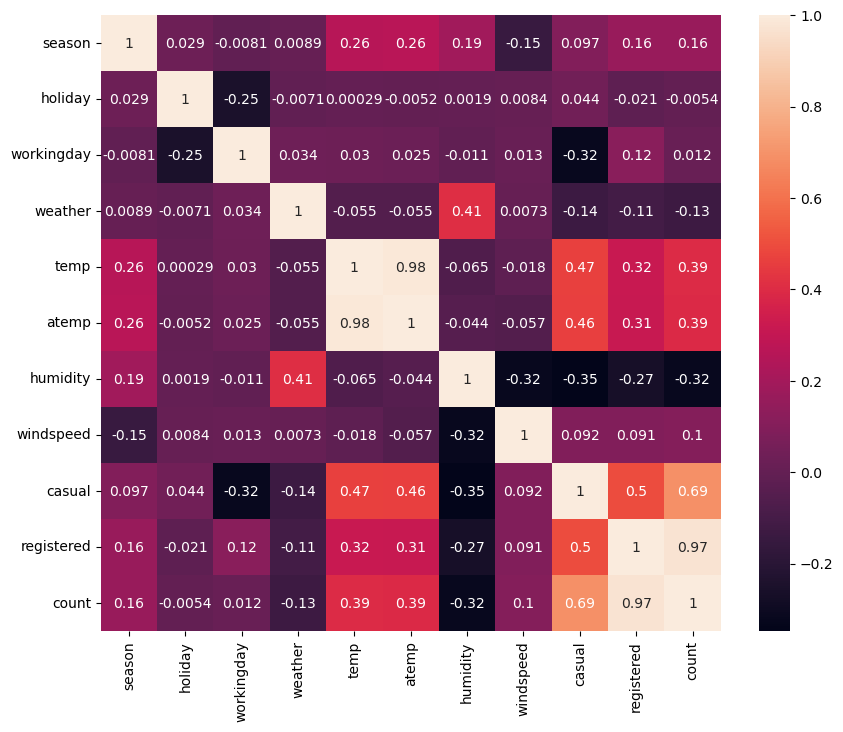

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Problem Statement

#### 1. The company wants to know: Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

In [54]:
# We conducted a series of test to proove the relation between multiple variables
# From the test analysis, there is a 95% confident of relation between season, weather, holiday to count of cycles rented per hour
# Even categorically there is a much relation between season and weather
# As a feature selection we can use Season, weather, holiday, temp, humidity, casual, registered, count
# We performed Kruskal, Mannwhiteneyu, chisquare test to find out the relation between variables. We didnt use Anova and Ttest, Because anova and ttest fails the assumption to conduct these tests

#### 2. How well those variables describe the electric cycle demands?

In [55]:
# Test was conducted for season, weather, holiday, workingday on count of cycles rented per hour
# The season and weather features are highly relative to count variable. Wherever rains or snow at those times the cycles rented was very low amount at that hour
# Even the temp, atemp, humidity and windspeed also have relation to season and weather, hence we can use those variable.
# We have rejected workingday variable, because there is not much confident in the data to proove the alternate hypothesis, Irrespective of working day people are using electric cycles
# While conducting tests for season and weather we have ignored Heavy Rain variable in weather, there is not much data point in it to conduct chisquare test
# Based on the season only the people are renting electric cycles, seasonal variable clearly explains how the dependent variable changes

In [56]:
from statsmodels.graphics.gofplots import qqplot

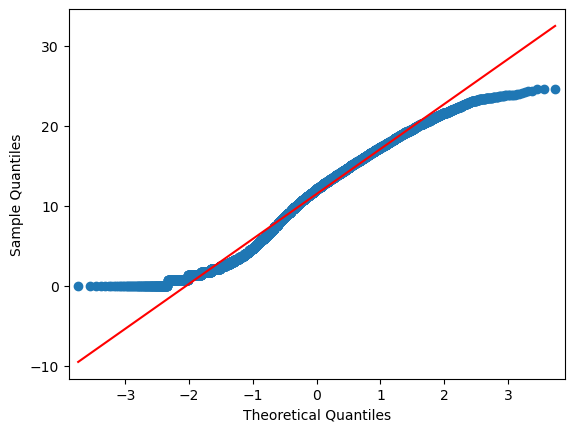

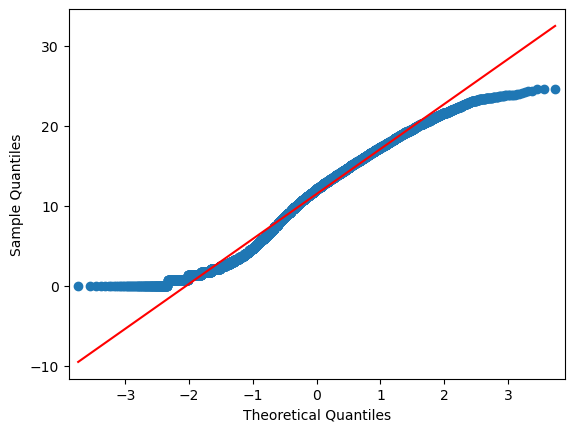

In [60]:
qqplot(stats.boxcox(df["count"])[0],line="s")